In [47]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import os
import random
import string

data = pd.read_csv('A_Z Handwritten Data.csv') # wczytywanie datasetu

In [48]:
data.shape # liczba wierszy x liczba kolumn (obrazki liter mają 28 x 28 px, 28*28 = 784 + 1 kolumna z indexem litery = 785)

(372450, 785)

In [49]:

data.head() # obraz pierwszych pięciu wierszy z dataframe'u

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
label = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',
         6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',
         12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',
         18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} # ustalenie jaka litera kryje się pod danym indexem

data.iloc[:,0] = data.iloc[:,0].map(label) # odniesienie do, iloc[: (wszystkie wiersze), 0 (pierwsza kolumna)] i zmapowanie na nowe wartości opisane przez label

In [51]:
data.head() # pierwsza kolumna teraz zamiast indexowania posiada literę do której się odnosi

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# podział na tabelę zawierającą tylko opisy i tylko dane

x = data.drop(data.columns[0], axis=1) # dataframe z usunieta pierwszą kolumną, data.columns[0] - wybranie pierwszej kolumny, axis=1 - chcemy usunąć kolumnę
y = data.iloc[:,0].copy() # Copying the label column

x = np.array(x) # przekształcenie w tablicę (NumPy) wartości
y = np.array(y) # opisów

Przykładowy obraz litery Y wygenerowany na podstawie danych


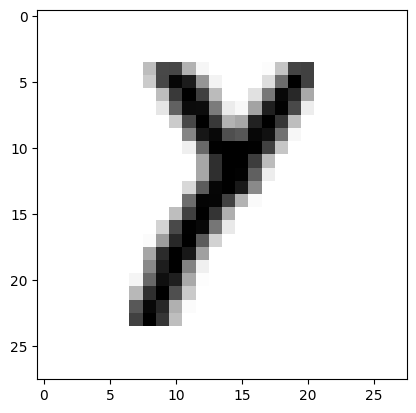

In [73]:
letter = 'Y' # wpisz dowolną literę alfabetu angielskiego aby uzyskać przykładowy obraz, wpisz @ aby pominąć kod
flag = True

if letter in string.ascii_uppercase: 

    for i in range(len(y)): # uzyskiwanie zakresu w jakim występuje dana litera,

        if y[i] == letter and flag:
            start_i = i
            flag = False

        if y[i] != letter and y[i-1] == letter:
            end_i = i-1

    if end_i == -1:
        end_i = len(y) - 1

    letter_index = random.randint(start_i, end_i) # wybieranie losowego indexu z przedzaiłu

    sample_data = x[letter_index] # wyświetlanie wiersza w postaci graficznej
    sample_image = sample_data.reshape(28,28)
    plt.imshow(sample_image,cmap=matplotlib.cm.binary,interpolation="nearest")

    print(f"Przykładowy obraz litery {y[letter_index]} wygenerowany na podstawie danych")

else:
    print("Wprowadzono błędny znak lub celowo pominięto kod!")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify = y, random_state = 42)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 1, weights= 'distance')
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("The accuracy of model is : ", accuracy_score(y_test,y_pred))